# **Importar y Declaración de Variables**



In [21]:
# Librerías principales
import pandas as pd
import matplotlib.pyplot as plt
import urllib.error
import folium

urls = {
      'Tienda 1': 'https://raw.githubusercontent.com/PamelaOrmeno/challenge-analisis-negocio/refs/heads/main/base-de-datos-challenge1-latam/tienda_1.csv',
      'Tienda 2': 'https://raw.githubusercontent.com/PamelaOrmeno/challenge-analisis-negocio/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv',
      'Tienda 3': 'https://raw.githubusercontent.com/PamelaOrmeno/challenge-analisis-negocio/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv',
      'Tienda 4': 'https://raw.githubusercontent.com/PamelaOrmeno/challenge-analisis-negocio/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv'
  }

# Lista para almacenar los DataFrames
dataframes = []

# Leer cada archivo CSV
for nombre_tienda, url in urls.items():
    try:
        df = pd.read_csv(url)
        if 'Precio' not in df.columns:
            raise ValueError(f"La columna 'Precio' no está presente en {nombre_tienda}")
        df['Tienda'] = nombre_tienda
        dataframes.append(df)
    except urllib.error.URLError:
        print(f"No se pudo acceder al archivo de {nombre_tienda}")
    except Exception as e:
        print(f"Error en {nombre_tienda}: {e}")

# Combinar todos los DataFrames en uno solo
df_final = pd.concat(dataframes, ignore_index=True)

# Definir colores diferentes para cada tienda
colores = {
    "Tienda 1": "#FF6F61",  # Rojo suave
    "Tienda 2": "#6B5B95",  # Azul/violeta
    "Tienda 3": "#88B04B",  # Verde oliva
    "Tienda 4": "#FFA500"   # Naranjo
}

#**1. Ingreso Total por Cada Tienda**

### Cálculo - Ingreso Total por Tienda

In [22]:
try:
    # Validar que existan las columnas necesarias
    if "Tienda" not in df_final.columns or "Precio" not in df_final.columns:
        raise KeyError("El DataFrame no contiene las columnas 'Tienda' y/o 'Precio'.")

    # Agrupar por tienda y sumar los ingresos
    ingresos_por_tienda = (
        df_final.groupby("Tienda")["Precio"]
        .sum()
        .sort_values(ascending=False)
    )

    # Mostrar ingresos por tienda formateados como moneda USD
    for tienda, ingreso in ingresos_por_tienda.items():
        ingreso_formateado = "${:,.0f}".format(ingreso).replace(",", ".")  # Reemplaza ',' por '.'
        print(f"{tienda}: {ingreso_formateado}")

except KeyError as e:
    print(f"Error de clave: {e}")
except Exception as e:
    print(f"Ocurrió un error al calcular los ingresos por tienda: {e}")


Tienda 1: $1.150.880.400
Tienda 2: $1.116.343.500
Tienda 3: $1.098.019.600
Tienda 4: $1.038.375.700


###Gráfico de Barra - Ingreso Total por Tienda

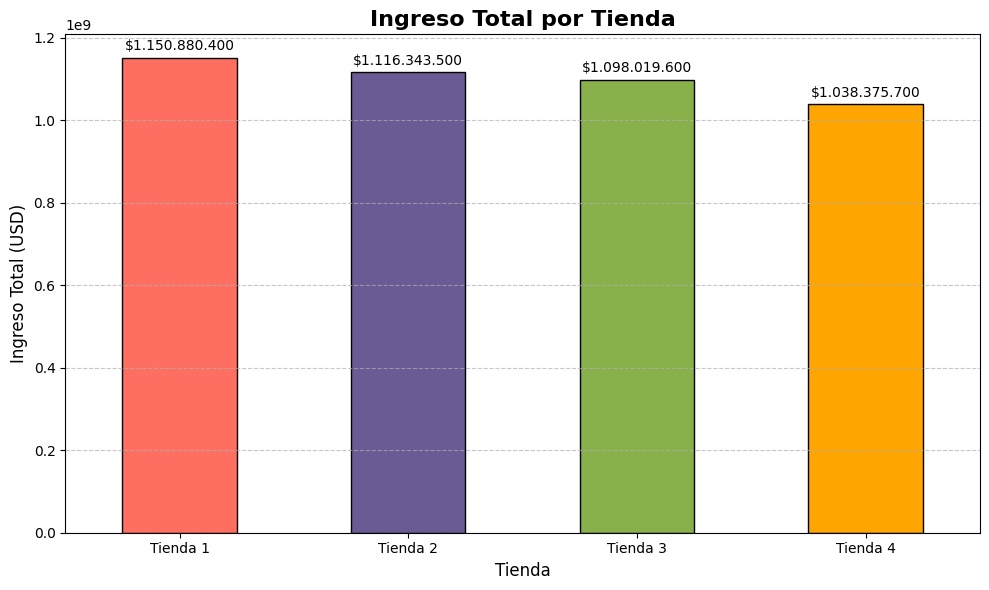

In [23]:
try:
    # Validar que ingresos_por_tienda no esté vacío
    if ingresos_por_tienda.empty:
        raise ValueError("La serie 'ingresos_por_tienda' está vacía. No se puede generar el gráfico.")

    # Validar que todos los nombres de tienda tengan un color definido
    if not all(tienda in colores for tienda in ingresos_por_tienda.index):
        raise KeyError("Faltan colores definidos para una o más tiendas.")

    # Crear gráfico de barras
    plt.figure(figsize=(10, 6))
    bars = ingresos_por_tienda.plot(
        kind='bar',
        color=[colores[tienda] for tienda in ingresos_por_tienda.index],
        edgecolor='black'
    )

    # Títulos y etiquetas
    plt.title("Ingreso Total por Tienda", fontsize=16, weight='bold')
    plt.xlabel("Tienda", fontsize=12)
    plt.ylabel("Ingreso Total (USD)", fontsize=12)
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Anotar los valores sobre cada barra
    for i, valor in enumerate(ingresos_por_tienda):
        valor_formateado = "${:,.0f}".format(valor).replace(",", ".")
        plt.text(i, valor + (valor * 0.01), valor_formateado, ha='center', va='bottom', fontsize=10)



    plt.tight_layout()
    plt.show()

except KeyError as e:
    print(f"Error de clave: {e}")
except ValueError as e:
    print(f"Error de valor: {e}")
except Exception as e:
    print(f"Ocurrió un error al generar el gráfico: {e}")


### Conclusión - Ingreso total por cada tienda

El análisis del ingreso total por tienda revela una **distribución equilibrada**, aunque con **diferencias relevantes** que permiten establecer prioridades estratégicas:

- Tienda 1 lidera el ranking con un ingreso total de 1.150.880.400 USD, posicionándose como el punto de venta más rentable. Esto sugiere una alta eficiencia operativa o una ubicación estratégica favorable.
- Le siguen Tienda 2 con 1.116.343.500 USD y Tienda 3 con 1.098.019.600 USD, ambas con desempeños sólidos y muy cercanos al líder, lo que indica una **competitividad estable entre estos locales**.
- Tienda 4, aunque con el menor ingreso (1.038.375.700 USD), mantiene un nivel alto de ventas, lo cual demuestra un buen rendimiento general a nivel de red.

En conjunto, todas las tiendas superan los 1.000 millones de dólares en ingresos, lo que refleja un **excelente comportamiento comercial** en el período analizado. Se recomienda mantener y reforzar las estrategias que han impulsado los resultados actuales, prestando atención a las **oportunidades de optimización específicas para cada tienda**.


#**2. Ventas por Categoría**

###Cálculo - Venta por Categoría

In [25]:
try:
    # Validar que las columnas necesarias existan en el DataFrame
    columnas_requeridas = {'Tienda', 'Categoría del Producto', 'Producto'}
    if not columnas_requeridas.issubset(df_final.columns):
        faltantes = columnas_requeridas - set(df_final.columns)
        raise KeyError(f"Faltan las siguientes columnas en el DataFrame: {faltantes}")

    # Agrupar y contar cantidad de productos vendidos por tienda y categoría
    ventas_categoria = (
        df_final.groupby(['Tienda', 'Categoría del Producto'])['Producto']
        .count()
        .reset_index()
        .rename(columns={'Producto': 'Cantidad Vendida'})
        .sort_values(['Tienda', 'Cantidad Vendida'], ascending=[True, False])
    )

    # Formatear la columna de cantidades con punto como separador de miles
    ventas_categoria['Cantidad Vendida'] = ventas_categoria['Cantidad Vendida'].apply(
        lambda x: f"{x:,}".replace(",", ".")
    )

    # Mostrar resultados
    print(ventas_categoria)

except KeyError as e:
    print(f"Error de clave: {e}")
except Exception as e:
    print(f"Error en el cálculo de ventas por categoría: {e}")


      Tienda   Categoría del Producto Cantidad Vendida
7   Tienda 1                  Muebles              465
3   Tienda 1             Electrónicos              448
5   Tienda 1                 Juguetes              324
2   Tienda 1        Electrodomésticos              312
1   Tienda 1     Deportes y diversión              284
4   Tienda 1   Instrumentos musicales              182
6   Tienda 1                   Libros              173
0   Tienda 1  Artículos para el hogar              171
15  Tienda 2                  Muebles              442
11  Tienda 2             Electrónicos              422
13  Tienda 2                 Juguetes              313
10  Tienda 2        Electrodomésticos              305
9   Tienda 2     Deportes y diversión              275
12  Tienda 2   Instrumentos musicales              224
14  Tienda 2                   Libros              197
8   Tienda 2  Artículos para el hogar              181
23  Tienda 3                  Muebles              499
19  Tienda

###Gráfico de Barra - Venta por Categoría

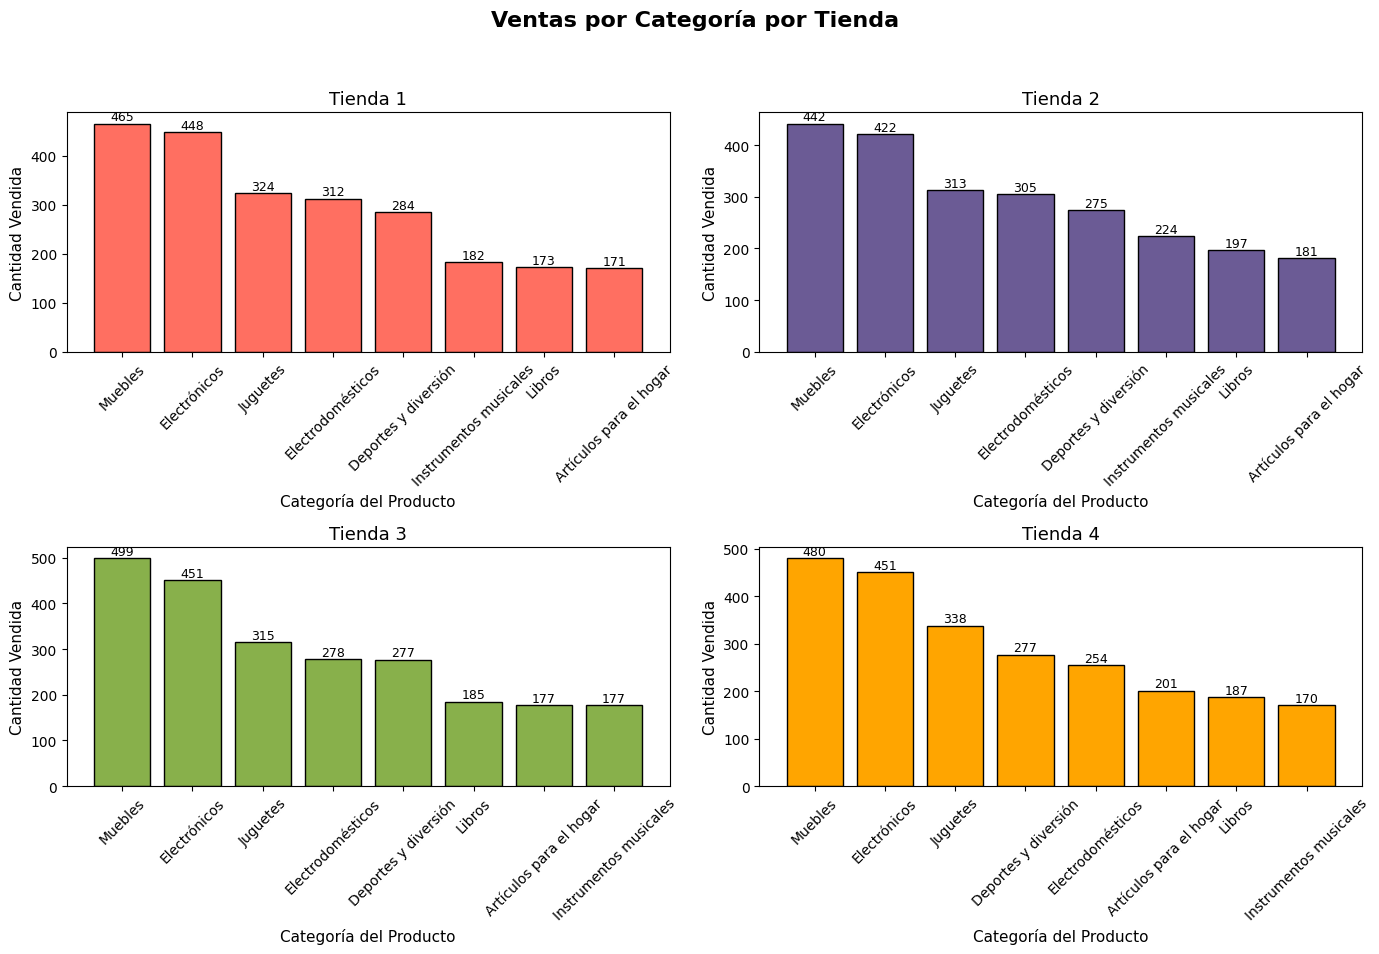

In [27]:
try:
    # Validar columnas requeridas
    columnas_requeridas = {'Tienda', 'Categoría del Producto', 'Cantidad Vendida'}
    if not columnas_requeridas.issubset(ventas_categoria.columns):
        faltantes = columnas_requeridas - set(ventas_categoria.columns)
        raise KeyError(f"Faltan columnas en 'ventas_categoria': {faltantes}")

    # Asegurarse de que Cantidad Vendida sea numérica (por si fue formateada antes)
    ventas_categoria['Cantidad Vendida'] = pd.to_numeric(ventas_categoria['Cantidad Vendida'], errors='coerce')

    # Crear subplots
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle('Ventas por Categoría por Tienda', fontsize=16, weight='bold')

    tiendas_unicas = ventas_categoria['Tienda'].unique()

    for i, tienda in enumerate(tiendas_unicas):
        if i >= 4:
            print(f"⚠️ Advertencia: solo se mostrarán las primeras 4 tiendas. '{tienda}' quedará fuera del gráfico.")
            continue

        ax = axs[i // 2, i % 2]
        datos_tienda = ventas_categoria[ventas_categoria['Tienda'] == tienda]
        datos_tienda = datos_tienda.sort_values(by='Cantidad Vendida', ascending=False)

        ax.bar(
            datos_tienda['Categoría del Producto'],
            datos_tienda['Cantidad Vendida'],
            color=colores.get(tienda, 'gray'),
            edgecolor='black'
        )
        ax.set_title(f"{tienda}", fontsize=13)
        ax.set_xlabel('Categoría del Producto', fontsize=11)
        ax.set_ylabel('Cantidad Vendida', fontsize=11)
        ax.tick_params(axis='x', rotation=45)

        # Añadir etiquetas con formato separador de miles
        for j, valor in enumerate(datos_tienda['Cantidad Vendida']):
            if pd.notnull(valor):
                texto = f"{valor:,.0f}".replace(",", ".")
                ax.text(j, valor + 0.5, texto, ha='center', va='bottom', fontsize=9)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

except KeyError as e:
    print(f"Error de clave: {e}")
except TypeError as e:
    print(f"Error de tipo: {e}")
except Exception as e:
    print(f"Ocurrió un error al generar el gráfico por tienda: {e}")


###Gráfico Barras Apiladas - Venta por Categoría

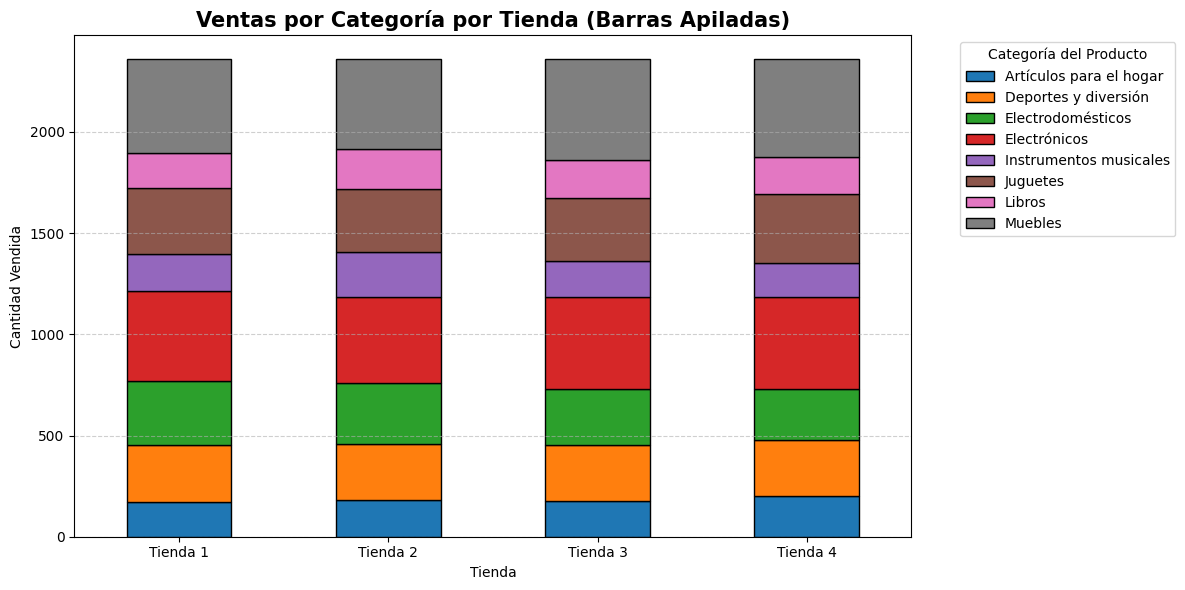

In [28]:
try:
    # Validar columnas necesarias
    columnas_requeridas = {'Tienda', 'Categoría del Producto', 'Cantidad Vendida'}
    if not columnas_requeridas.issubset(ventas_categoria.columns):
        faltantes = columnas_requeridas - set(ventas_categoria.columns)
        raise KeyError(f"Faltan columnas en 'ventas_categoria': {faltantes}")

    # Asegurar que 'Cantidad Vendida' sea numérica
    ventas_categoria['Cantidad Vendida'] = pd.to_numeric(ventas_categoria['Cantidad Vendida'], errors='coerce')

    # Crear tabla pivote
    pivot_df = ventas_categoria.pivot_table(
        index='Tienda',
        columns='Categoría del Producto',
        values='Cantidad Vendida',
        aggfunc='sum',
        fill_value=0  # por si hay categorías faltantes en alguna tienda
    )

    # Graficar barras apiladas
    pivot_df.plot(
        kind='bar',
        stacked=True,
        figsize=(12, 6),
        edgecolor='black'
    )

    plt.title("Ventas por Categoría por Tienda (Barras Apiladas)", fontsize=15, weight='bold')
    plt.xlabel("Tienda")
    plt.ylabel("Cantidad Vendida")
    plt.xticks(rotation=0)
    plt.legend(title='Categoría del Producto', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Ocurrió un error al graficar barras apiladas: {e}")


### Conclusión - Venta por Categoría

El análisis de ventas por categoría revela patrones consistentes entre las tiendas, permitiendo identificar las preferencias de los consumidores y el peso relativo de cada línea de productos:

- **Muebles** es la categoría más vendida en todas las tiendas, con especial fuerza en la Tienda 3 (499 unidades) y Tienda 4 (480 unidades), consolidándose como el rubro más fuerte en términos de volumen general.
- **Electrónicos** mantiene una posición destacada en las cuatro tiendas, con un máximo de 451 unidades vendidas en Tienda 3 y Tienda 4. Este comportamiento sugiere una demanda constante por tecnología y dispositivos.
- **Juguetes** y **Electrodomésticos** compiten por el tercer lugar en ventas. Aunque sus volúmenes son más bajos, su presencia estable en cada tienda indica que son categorías importantes dentro del mix comercial.
- **Deportes y diversión**, **Libros**, **Artículos para el hogar** e **Instrumentos musicales** presentan ventas más moderadas, pero distribuidas consistentemente, lo que sugiere un comportamiento de consumo más nicho, aunque relevante.

Este desglose permite identificar oportunidades específicas de crecimiento y focalización. Mientras que las categorías líderes podrían beneficiarse de mayor stock y promociones, las de menor rotación podrían ser optimizadas a través de campañas especializadas o una mejor exhibición por tienda.

#**3. Valoración Promedio Tienda**

###Cálculo - Valoración Promedio Tienda

In [29]:
try:
    # Validar que exista la columna 'Calificación' y 'Tienda'
    columnas_necesarias = {'Calificación', 'Tienda'}
    if not columnas_necesarias.issubset(df_final.columns):
        faltantes = columnas_necesarias - set(df_final.columns)
        raise ValueError(f"Faltan columnas requeridas: {faltantes}")

    # Calcular promedio de calificación por tienda, redondeado a 2 decimales
    calificacion_promedio = df_final.groupby('Tienda')['Calificación'].mean().round(2)

    # Ordenar por orden manual si están todas las tiendas
    orden_manual = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
    tiendas_faltantes = [t for t in orden_manual if t not in calificacion_promedio.index]
    if tiendas_faltantes:
        print(f"⚠️ Advertencia: no se encontraron las siguientes tiendas: {tiendas_faltantes}")

    calificacion_promedio = calificacion_promedio.reindex(orden_manual)

    # Mostrar calificaciones con punto como separador decimal (ya es el estándar)
    for tienda, calificacion in calificacion_promedio.items():
        if pd.notnull(calificacion):
            print(f"{tienda}: {calificacion:.2f}")
        else:
            print(f"{tienda}: (sin datos)")

except Exception as e:
    print(f"Error en el cálculo de la calificación promedio: {e}")


Tienda 1: 3.98
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.00


##Gráfico de Barra - Valoración Promedio por Tienda

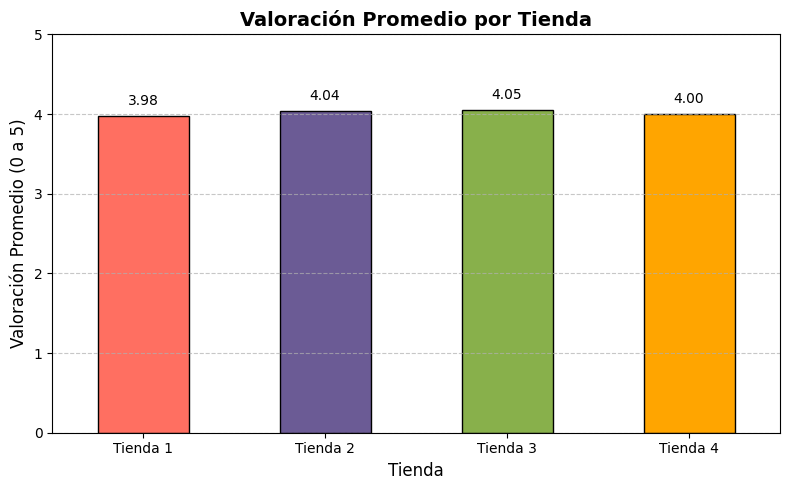

In [30]:
try:
    # Validar que 'calificacion_promedio' esté definido y tenga datos
    if 'calificacion_promedio' not in locals() or calificacion_promedio.empty:
        raise ValueError("No se ha definido o está vacío el objeto 'calificacion_promedio'.")

    # Validar índice esperado
    tiendas_esperadas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
    tiendas_faltantes = [t for t in tiendas_esperadas if t not in calificacion_promedio.index]
    if tiendas_faltantes:
        print(f"Advertencia: faltan datos de calificación para: {tiendas_faltantes}")

    # Reordenar manualmente
    calificacion_promedio = calificacion_promedio.reindex(tiendas_esperadas)

    # Crear gráfico
    plt.figure(figsize=(8, 5))
    bars = calificacion_promedio.plot(
        kind='bar',
        color=[colores.get(t, 'gray') for t in calificacion_promedio.index],
        edgecolor='black'
    )

    # Títulos y etiquetas
    plt.title("Valoración Promedio por Tienda", fontsize=14, weight='bold')
    plt.xlabel("Tienda", fontsize=12)
    plt.ylabel("Valoración Promedio (0 a 5)", fontsize=12)
    plt.ylim(0, 5)
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Agregar etiquetas con formato decimal (punto como separador)
    for i, valor in enumerate(calificacion_promedio):
        if pd.notnull(valor):
            plt.text(i, valor + 0.1, f"{valor:.2f}", ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()

except ValueError as e:
    print(f"Error de validación: {e}")
except Exception as e:
    print(f"Ocurrió un error al generar el gráfico de valoración promedio: {e}")


##Gráfico Torta - Valoración Promedio por Tienda

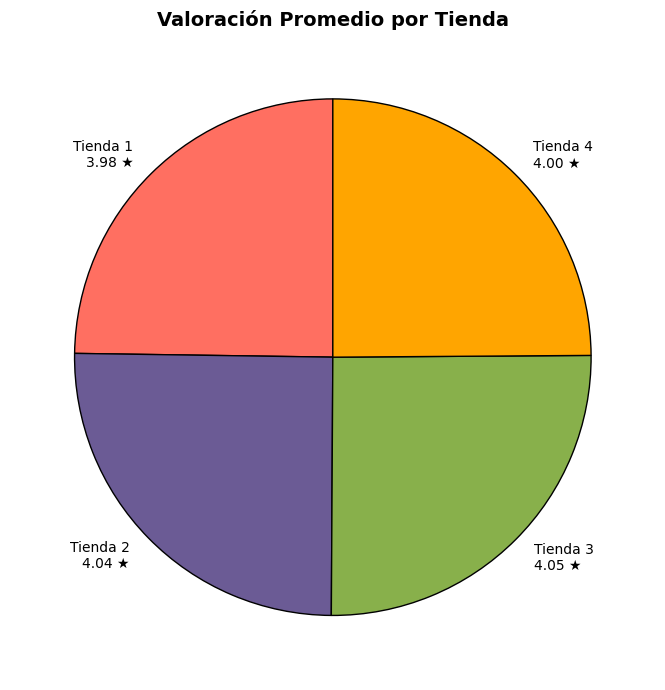

In [31]:
try:
    import matplotlib.pyplot as plt

    # Validación básica
    if 'calificacion_promedio' not in locals() or calificacion_promedio.empty:
        raise ValueError("No se ha definido o está vacío el objeto 'calificacion_promedio'.")

    # Definir colores por tienda si están disponibles
    colores_torta = [colores.get(t, 'gray') for t in calificacion_promedio.index]

    # Crear gráfico de torta
    plt.figure(figsize=(7, 7))
    plt.pie(
        calificacion_promedio,
        labels=[f"{tienda}\n{valor:.2f} ★" for tienda, valor in calificacion_promedio.items()],
        colors=colores_torta,
        startangle=90,
        wedgeprops={'edgecolor': 'black'}
    )

    plt.title("Valoración Promedio por Tienda", fontsize=14, weight='bold')
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Ocurrió un error al generar el gráfico de torta: {e}")


##Conclusión - Valoración Promedio por Tienda


El análisis de la valoración promedio por tienda revela una percepción positiva y bastante homogénea por parte de los clientes en todas las sucursales:

- **Tienda 3** obtiene la valoración más alta con un promedio de **4.05**, lo que sugiere un alto nivel de satisfacción del cliente.
- Le siguen **Tienda 2** con **4.04** y **Tienda 4** con **4.00**, ambas muy bien evaluadas, manteniendo un estándar de servicio consistente.
- **Tienda 1**, aunque con la menor valoración promedio (**3.98**), se encuentra dentro del rango positivo, lo que indica un desempeño aceptable, pero con margen de mejora respecto al resto.

En general, todas las tiendas se sitúan por sobre los **3.9 puntos**, lo que refleja una **experiencia de cliente sólida**, con oportunidades específicas de optimización en puntos de contacto, atención o logística, especialmente en Tienda 1.

#**4. Productos Más y Menos vendidos**

###Cálculo - Producto Más o Menos vendidos

In [32]:
try:
    # Validar existencia de columnas requeridas
    columnas_requeridas = {'Tienda', 'Producto'}
    if not columnas_requeridas.issubset(df_final.columns):
        faltantes = columnas_requeridas - set(df_final.columns)
        raise ValueError(f"Faltan columnas requeridas: {faltantes}")

    # Agrupar y contar productos por tienda
    ventas_productos = (
        df_final.groupby(['Tienda', 'Producto'])
        .size()
        .reset_index(name='Cantidad Vendida')
    )

    if ventas_productos.empty:
        raise ValueError("El DataFrame 'ventas_productos' está vacío. No se puede continuar.")

    # Inicializar lista de resultados
    productos_extremos = []

    # Procesar cada tienda
    tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
    for tienda in tiendas:
        datos_tienda = ventas_productos[ventas_productos['Tienda'] == tienda]

        if datos_tienda.empty:
            print(f"Advertencia: {tienda} no tiene datos disponibles.")
            continue

        # Extraer productos extremos
        producto_mas_vendido = datos_tienda.loc[datos_tienda['Cantidad Vendida'].idxmax()]
        producto_menos_vendido = datos_tienda.loc[datos_tienda['Cantidad Vendida'].idxmin()]

        productos_extremos.append({
            'Tienda': tienda,
            'Producto más vendido': producto_mas_vendido['Producto'],
            'Cantidad más vendida': f"{producto_mas_vendido['Cantidad Vendida']:,}".replace(",", "."),
            'Producto menos vendido': producto_menos_vendido['Producto'],
            'Cantidad menos vendida': f"{producto_menos_vendido['Cantidad Vendida']:,}".replace(",", ".")
        })

    # Crear DataFrame ordenado
    tabla_extremos = pd.DataFrame(productos_extremos).sort_values(by='Tienda')

    # Mostrar tabla
    from IPython.display import display
    display(tabla_extremos)

except Exception as e:
    print(f"Error al calcular los productos más y menos vendidos: {e}")


,Tienda,Producto más vendido,Cantidad más vendida,Producto menos vendido,Cantidad menos vendida
0,Tienda 1,Armario,60,Auriculares con micrófono,33
1,Tienda 2,Iniciando en programación,65,Juego de mesa,32
2,Tienda 3,Kit de bancas,57,Bloques de construcción,35
3,Tienda 4,Cama box,62,Guitarra eléctrica,33


###Gráfico de Barra -  Producto Más y Menos Vendido por Tienda

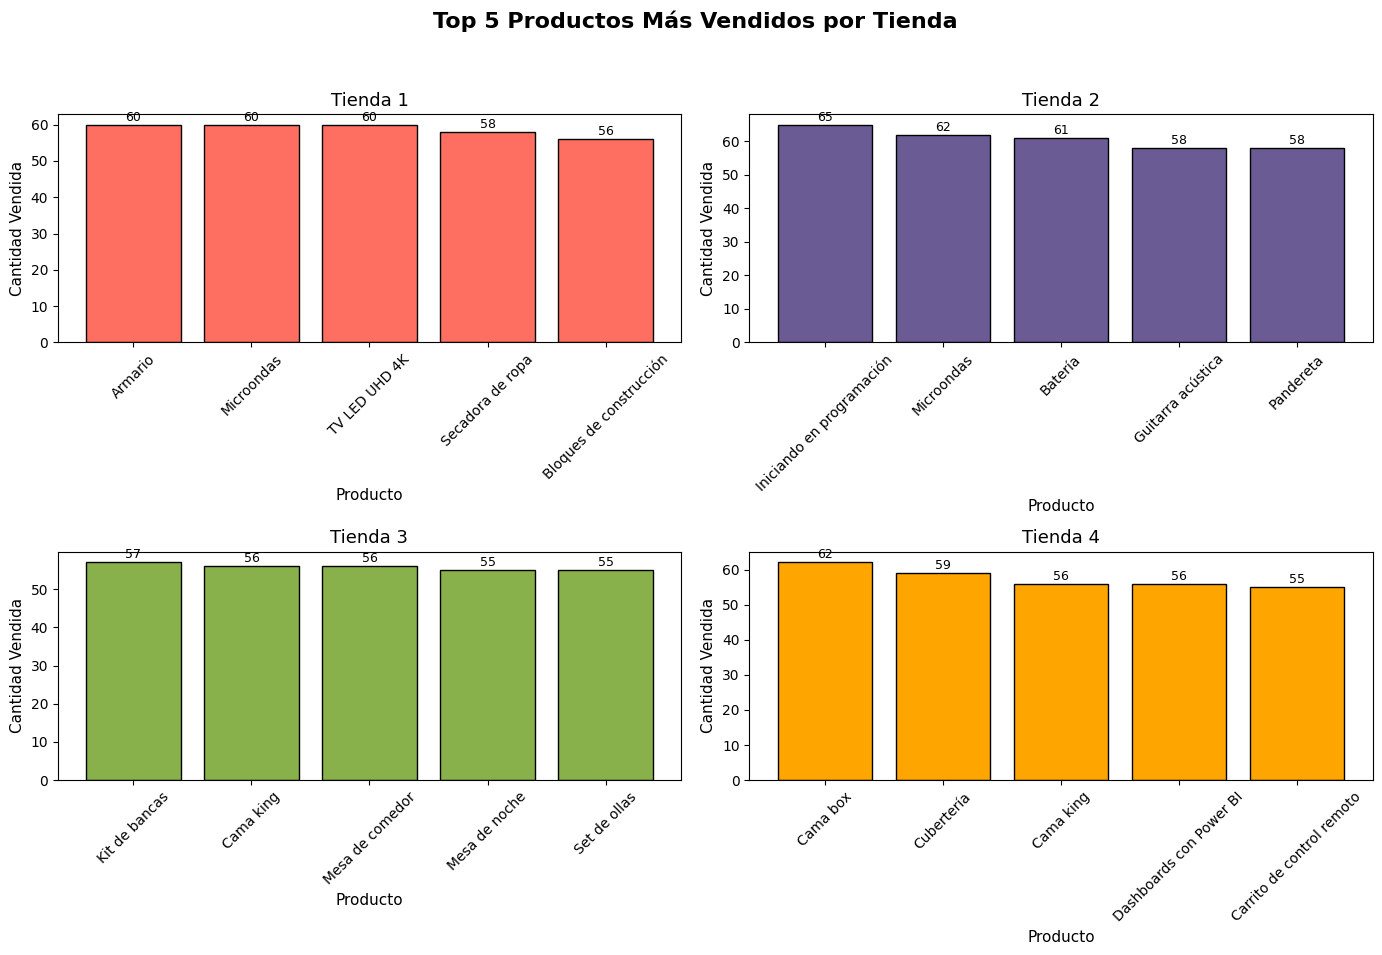

In [34]:
try:
    # Validar existencia de columnas requeridas
    columnas_requeridas = {'Tienda', 'Producto', 'Cantidad Vendida'}
    if not columnas_requeridas.issubset(ventas_productos.columns):
        faltantes = columnas_requeridas - set(ventas_productos.columns)
        raise ValueError(f"Faltan columnas requeridas en 'ventas_productos': {faltantes}")

    # Verificar que existan datos
    if ventas_productos.empty:
        raise ValueError("El DataFrame 'ventas_productos' está vacío.")

    # Crear figura y subgráficos
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle('Top 5 Productos Más Vendidos por Tienda', fontsize=16, weight='bold')

    tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

    for i, tienda in enumerate(tiendas):
        ax = axs[i // 2, i % 2]
        datos_tienda = ventas_productos[ventas_productos['Tienda'] == tienda]

        if datos_tienda.empty:
            ax.set_title(f"{tienda} (sin datos)")
            ax.axis('off')
            continue

        top5 = datos_tienda.nlargest(5, 'Cantidad Vendida')

        bars = ax.bar(
            top5['Producto'],
            top5['Cantidad Vendida'],
            color=colores.get(tienda, 'gray'),
            edgecolor='black'
        )

        ax.set_title(f"{tienda}", fontsize=13)
        ax.set_xlabel('Producto', fontsize=11)
        ax.set_ylabel('Cantidad Vendida', fontsize=11)
        ax.tick_params(axis='x', rotation=45)

        # Etiquetas con separador de miles (punto)
        for j, valor in enumerate(top5['Cantidad Vendida']):
            valor_formateado = f"{valor:,.0f}".replace(",", ".")
            ax.text(j, valor + 0.3, valor_formateado, ha='center', va='bottom', fontsize=9)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

except Exception as e:
    print(f"Error al generar el gráfico de top productos por tienda: {e}")


### Conclusión - Productos Más y Menos Vendidos


El análisis de los productos más y menos vendidos por tienda permite identificar patrones de consumo y oportunidades comerciales diferenciadas según el comportamiento de los clientes:

- **Tienda 1** destaca por la alta demanda del producto *Armario* (60 unidades vendidas), lo que sugiere interés en artículos de mobiliario. En contraste, el producto con menor rotación fue *Auriculares con micrófono* (33 unidades), posiblemente reflejando menor prioridad en tecnología o accesorios.
- **Tienda 2** lidera en volumen con *Iniciando en programación* (65 unidades), lo que indica una fuerte inclinación hacia productos educativos. Su producto menos vendido fue *Juego de mesa* (32 unidades), lo que podría estar vinculado a preferencias familiares o estacionales.
- **Tienda 3** tuvo como producto más solicitado el *Kit de bancas* (57 unidades), lo que refuerza el interés en artículos de ejercicio o mobiliario funcional. El producto con menor demanda fue *Bloques de construcción* (35 unidades), quizás por una menor presencia de público infantil.
- **Tienda 4** alcanzó su mayor volumen de ventas con la *Cama box* (62 unidades), destacando nuevamente la categoría de muebles como fuerte. Por otro lado, la *Guitarra eléctrica* (33 unidades) fue la de menor venta, lo que puede estar relacionado con un nicho más específico o menor rotación.

Este tipo de análisis permite tomar decisiones informadas sobre reposición, promociones y campañas focalizadas, priorizando aquellos productos con mayor impacto comercial en cada tienda, y reevaluando la estrategia para los de menor salida.


#**5. Valor Envío Promedio por Tienda**

###Cálculo - Valor del envío promedio por tienda

In [35]:
try:
    # Validar existencia de columnas requeridas
    columnas_requeridas = {'Tienda', 'Costo de envío'}
    if not columnas_requeridas.issubset(df_final.columns):
        faltantes = columnas_requeridas - set(df_final.columns)
        raise ValueError(f"Faltan columnas requeridas: {faltantes}")

    # Validar que haya datos
    if df_final.empty:
        raise ValueError("El DataFrame 'df_final' está vacío.")

    # Calcular promedio del costo de envío por tienda
    envio_promedio = df_final.groupby('Tienda')['Costo de envío'].mean().round(0)

    # Orden manual para consistencia
    orden_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
    envio_promedio = envio_promedio.reindex(orden_tiendas)

    # Mostrar resultados con formato moneda USD y punto como separador de miles
    for tienda, costo in envio_promedio.items():
        if pd.notnull(costo):
            print(f"{tienda}: ${int(costo):,}".replace(",", "."))
        else:
            print(f"{tienda}: (sin datos)")

except ValueError as e:
    print(f"Error de validación: {e}")
except Exception as e:
    print(f"Error en el cálculo del envío promedio por tienda: {e}")


Tienda 1: $26.019
Tienda 2: $25.216
Tienda 3: $24.806
Tienda 4: $23.459


##Gráfico de Barra - Costo Promedio de Envío

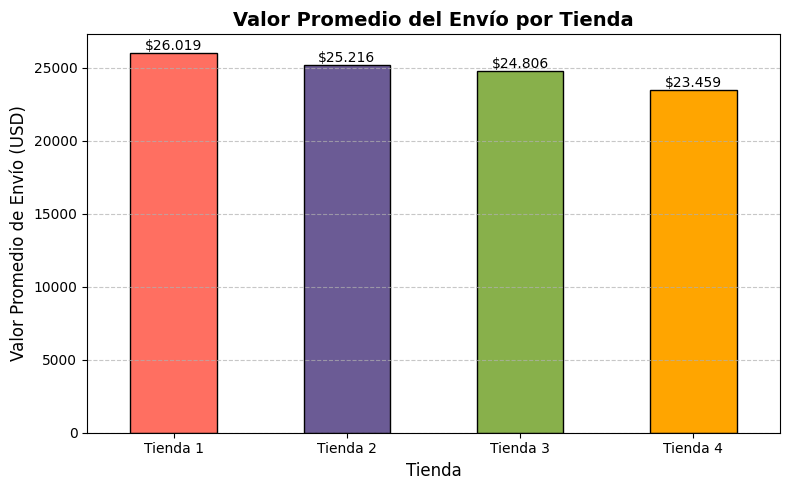

In [36]:
try:
    # Validar que 'envio_promedio' exista y no esté vacío
    if 'envio_promedio' not in locals() or envio_promedio.empty:
        raise ValueError("El objeto 'envio_promedio' no está definido o no contiene datos.")

    # Validar índice esperado (opcional)
    tiendas_esperadas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
    envio_promedio = envio_promedio.reindex(tiendas_esperadas)

    # Crear gráfico
    plt.figure(figsize=(8, 5))
    bars = envio_promedio.plot(
        kind='bar',
        color=[colores.get(tienda, 'gray') for tienda in envio_promedio.index],
        edgecolor='black'
    )

    # Títulos y etiquetas
    plt.title("Valor Promedio del Envío por Tienda", fontsize=14, weight='bold')
    plt.xlabel("Tienda", fontsize=12)
    plt.ylabel("Valor Promedio de Envío (USD)", fontsize=12)
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Etiquetas de valor sobre cada barra
    for i, valor in enumerate(envio_promedio):
        if pd.notnull(valor):
            valor_formateado = f"${valor:,.0f}".replace(",", ".")
            plt.text(i, valor + 0.5, valor_formateado, ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Error al generar el gráfico de envío promedio: {e}")


##Gráfico de líneas - Costo promedio de envío

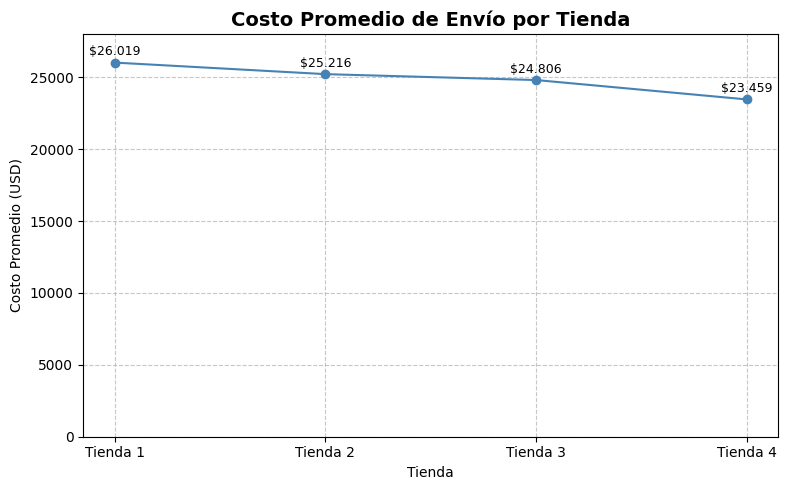

In [37]:
try:
    # Validación de datos
    if 'envio_promedio' not in locals() or envio_promedio.empty:
        raise ValueError("El objeto 'envio_promedio' no está definido o no contiene datos.")

    # Orden manual para consistencia visual
    tiendas_orden = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
    envio_promedio = envio_promedio.reindex(tiendas_orden)

    # Crear gráfico
    plt.figure(figsize=(8, 5))
    plt.plot(envio_promedio.index, envio_promedio.values, marker='o', linestyle='-', color='steelblue')

    # Títulos y etiquetas
    plt.title("Costo Promedio de Envío por Tienda", fontsize=14, weight='bold')
    plt.xlabel("Tienda")
    plt.ylabel("Costo Promedio (USD)")
    plt.ylim(0, envio_promedio.max() + 2000)
    plt.grid(True, linestyle='--', alpha=0.7)

    # Etiquetas de valor
    for i, valor in enumerate(envio_promedio):
        texto = f"${valor:,.0f}".replace(",", ".")
        plt.text(i, valor + 500, texto, ha='center', fontsize=9)

    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Error al generar el gráfico de líneas para costo de envío: {e}")


##Conclusión - Valor del Envío Promedio por Tienda

El análisis del valor promedio del envío por tienda muestra diferencias relevantes que pueden estar asociadas a factores logísticos, ubicación geográfica o políticas internas de costo.

**Tienda 1** presenta el valor de envío más alto, con un promedio de $26.019, lo que podría indicar una mayor distancia promedio en los despachos o una menor eficiencia operativa.

**Tienda 2** y **Tienda 3** muestran costos intermedios, valores competitivos dentro del promedio general.

**Tienda 4** destaca por tener el costo de envío más bajo, con un promedio de $23.459, lo que podría representar una ventaja estratégica en términos de percepción de valor por parte del cliente.

Estas diferencias, aunque sutiles, pueden influir en la decisión de compra, especialmente en productos de menor valor unitario. Se recomienda revisar las causas de estas variaciones y evaluar mejoras logísticas para reducir los costos sin comprometer la calidad del servicio.


# 📊 Informe Final: ¿Qué tienda debe vender el Sr. Juan?

### 🔎 Introducción

El presente informe tiene como objetivo principal analizar el desempeño de las cuatro tiendas bajo revisión y, con base en los datos recolectados y visualizaciones generadas, recomendar cuál de ellas el Sr. Juan debería vender.

Se consideran los siguientes factores clave para esta decisión:

- Ingresos totales por tienda.
- Categorías de productos más y menos vendidas.
- Calificación promedio de los clientes.
- Productos más y menos vendidos.
- Costo promedio de envío.

Este enfoque busca evaluar integralmente la rentabilidad, percepción del cliente y eficiencia operativa de cada tienda, para tomar una decisión informada y estratégica.

### 📊 Desarrollo del análisis

#### 💰 Ingresos totales

- **Tienda 1**: \$1.150.880.400 _(más alto)_
- **Tienda 2**: \$1.116.343.500  
- **Tienda 3**: \$1.098.019.600  
- **Tienda 4**: \$1.038.375.700 _(más bajo)_

Tienda 4 presenta los ingresos más bajos, con una diferencia de más de \$112 millones respecto a la Tienda 1.

---

#### 🧾 Categorías de productos más vendidas

En todas las tiendas, **Muebles** y **Electrónicos** son las categorías con mayor volumen de ventas.  
Tienda 3 lidera en Muebles (499 unidades), mientras Tienda 4 también muestra fortaleza en esta categoría.

Sin embargo, Tienda 4 presenta los niveles más bajos en categorías como:

- Instrumentos musicales: 170 unidades  
- Libros: 187 unidades  

Esto indica menor equilibrio en su portafolio de productos respecto a las demás tiendas.

---

#### ⭐ Calificación promedio de clientes

- **Tienda 3**: 4.05 _(más alta)_
- **Tienda 2**: 4.04  
- **Tienda 4**: 4.00  
- **Tienda 1**: 3.98 _(más baja)_

Aunque Tienda 1 tiene la calificación más baja, Tienda 4 tampoco destaca especialmente en este aspecto.

---

#### 🛍️ Productos más y menos vendidos

- **Tienda 4**:  
  - Producto más vendido: _Cama box_ (62 unidades)  
  - Producto menos vendido: _Guitarra eléctrica_ (33 unidades)  
  - Diferencia: 29 unidades  

Esto representa una **rotación más estrecha** que en otras tiendas, lo que puede señalar menor dinamismo de ventas.

---

#### 🚚 Costo promedio de envío

- **Tienda 4**: \$23.459 _(más bajo)_
- **Tienda 3**: \$24.806  
- **Tienda 2**: \$25.216  
- **Tienda 1**: \$26.019 _(más alto)_

Tienda 4 es la más eficiente en términos logísticos, lo cual es una **fortaleza operativa**.


### ✅ Conclusión: ¿Qué tienda debería vender el Sr. Juan?

Luego de analizar todos los indicadores, se concluye que **la tienda que el Sr. Juan debería vender es la Tienda 4**.

#### Justificación:

- Tiene el **nivel más bajo de ingresos totales**, con una diferencia considerable respecto a las demás.
- Posee **menor rotación relativa** entre su producto más y menos vendido, reflejando menor dinamismo comercial.
- Su **calificación promedio** es aceptable, pero inferior a la de Tienda 3 y Tienda 2.
- Aunque su **costo de envío es el más bajo**, esta ventaja **no compensa su bajo rendimiento general**.

Por tanto, Tienda 4 es la **menos competitiva del grupo**, y representa la mejor opción para ser vendida. Esto permitiría al Sr. Juan enfocarse en mejorar y potenciar las tiendas restantes, con mejor posicionamiento comercial y percepción del cliente.
